## CART for Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,
    mean_squared_error, r2_score
)

In [2]:
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [3]:
cart_clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
cart_clf.fit(X_train, y_train)
y_pred = cart_clf.predict(X_test)

Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.96      0.92      0.94        26

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



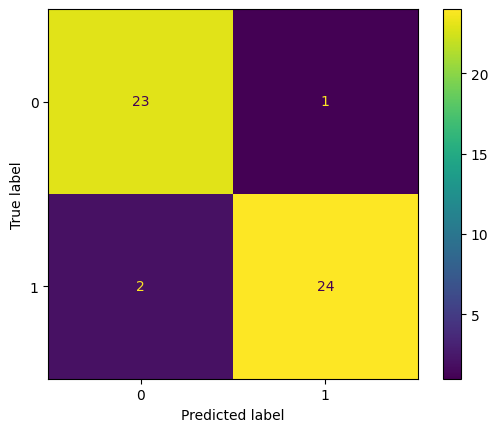

In [4]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(cart_clf, X_test, y_test)
plt.show()

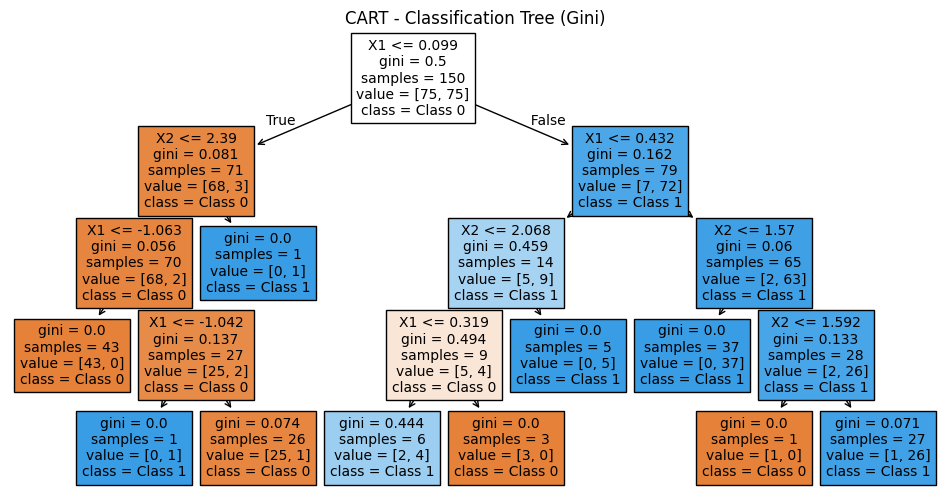

In [11]:
plt.figure(figsize=(12, 6))
plot_tree(cart_clf, filled=True, feature_names=["X1", "X2"], class_names=["Class 0", "Class 1"])
plt.title("CART - Classification Tree (Gini)")
plt.show()

## CART for Regression

In [6]:
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=10, random_state=0)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [7]:
cart_reg = DecisionTreeRegressor(max_depth=4, random_state=0)
cart_reg.fit(X_train_r, y_train_r)

DecisionTreeRegressor(max_depth=4, random_state=0)

MSE: 207.14795950008278
R² Score: 0.8984989780514623


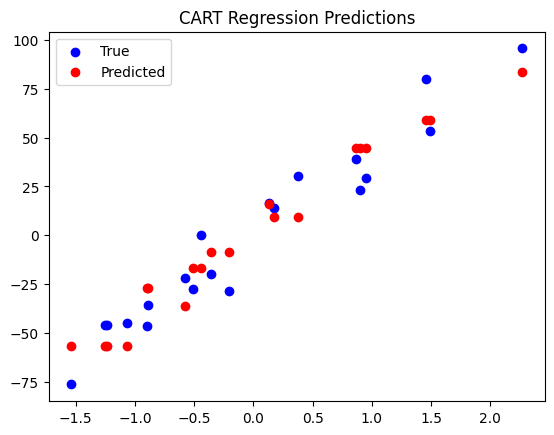

In [8]:
y_pred_r = cart_reg.predict(X_test_r)

print("MSE:", mean_squared_error(y_test_r, y_pred_r))
print("R² Score:", r2_score(y_test_r, y_pred_r))

# Plot regression result
plt.scatter(X_test_r, y_test_r, label="True", color="blue")
plt.scatter(X_test_r, y_pred_r, label="Predicted", color="red")
plt.title("CART Regression Predictions")
plt.legend()
plt.show()

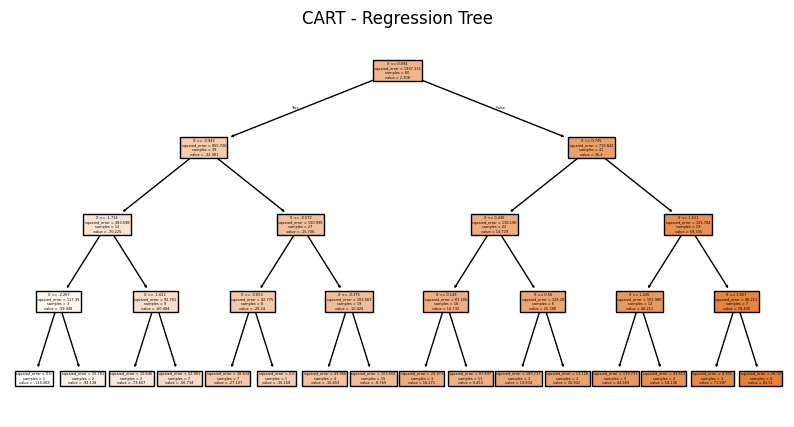

In [9]:
plt.figure(figsize=(10, 5))
plot_tree(cart_reg, filled=True, feature_names=["X"])
plt.title("CART - Regression Tree")
plt.show()